In [267]:
# Import packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns

In [268]:
df1 = pd.read_csv('Model_data_DA_1_20210817-213751.csv')
df2 = pd.read_csv('Model_data_DA_2_20210817-213751.csv')
df3 = pd.read_csv('Model_data_DA_3_20210817-213751.csv')

In [269]:
df1

,Iteration,DAs_load\nE_DAs_L,DAs_generation\nE_DAs_G,DAs_demand_bid\nb_t,DAs_supply_offer\no_t,EVs_Charge,EVs_Discharge,TCL_Power,SL_Power,Inflexible_loads,...,CDA1_supply,CDA2_supply,CDA1_demand,CDA2_demand,Bus1_price,Bus2_price,Bus3_price,Theta_bus_1,Theta_bus_2,Theta_bus_3
0,0,0.476319,0.0,0.476319,0.0,0.000000e+00,0.0,0.000000e+00,0.131144,0.346111,...,0.0,0.000,0.365000,0.529000,15.0,15.0,15.0,0.0,0.0,0.0
1,0,0.598838,0.0,0.598838,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.599952,...,0.0,0.000,0.210000,0.861000,15.0,15.0,15.0,0.0,0.0,0.0
2,0,1.046580,0.0,1.046580,0.0,3.574468e-02,0.0,0.000000e+00,0.227101,0.784733,...,0.0,0.721,0.937000,0.000000,15.0,15.0,15.0,0.0,0.0,0.0
3,0,1.024323,0.0,1.024323,0.0,0.000000e+00,0.0,0.000000e+00,0.196625,0.828766,...,0.0,0.000,0.609000,0.537000,15.0,15.0,15.0,0.0,0.0,0.0
4,0,0.913319,0.0,0.913319,0.0,1.851064e-02,0.0,0.000000e+00,0.084081,0.810728,...,0.0,0.000,0.729000,0.641000,15.0,15.0,15.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,499,0.421099,0.0,0.421099,0.0,7.105427e-18,0.0,3.686287e-20,0.089976,0.332132,...,0.0,0.000,0.639374,0.514534,15.0,15.0,15.0,0.0,0.0,0.0
11996,499,0.316411,0.0,0.316411,0.0,0.000000e+00,0.0,0.000000e+00,0.016436,0.300967,...,0.0,0.000,0.963705,0.445589,15.0,15.0,15.0,0.0,0.0,0.0
11997,499,0.289869,0.0,0.289869,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.290863,...,0.0,0.000,0.559277,0.963276,15.0,15.0,15.0,0.0,0.0,0.0
11998,499,1.319412,0.0,1.319412,0.0,0.000000e+00,0.0,0.000000e+00,1.011473,0.308949,...,0.0,0.000,1.259988,1.093104,15.0,15.0,15.0,0.0,0.0,0.0


In [270]:
df1.columns

Index(['Iteration', 'DAs_load\nE_DAs_L', 'DAs_generation\nE_DAs_G',
       'DAs_demand_bid\nb_t', 'DAs_supply_offer\no_t', 'EVs_Charge',
       'EVs_Discharge', 'TCL_Power', 'SL_Power', 'Inflexible_loads',
       'Solar_Power', 'Gen1', 'Gen2', 'Gen3', 'CDA1_supply', 'CDA2_supply',
       'CDA1_demand', 'CDA2_demand', 'Bus1_price', 'Bus2_price', 'Bus3_price',
       'Theta_bus_1', 'Theta_bus_2', 'Theta_bus_3'],
      dtype='object')

### Drop iteration zero because it's begining and random

In [271]:
df1.drop(df1[df1.Iteration==0].index, inplace=True)
df2.drop(df2[df2.Iteration==0].index, inplace=True)
df3.drop(df3[df3.Iteration==0].index, inplace=True)

In [272]:
# Adding new column cost to preserve the cost paid by the DA
df1['Cost'] = (df1['DAs_load\nE_DAs_L']-df1['DAs_generation\nE_DAs_G'])*df1['Bus1_price']
df2['Cost'] = (df2['DAs_load\nE_DAs_L']-df2['DAs_generation\nE_DAs_G'])*df2['Bus2_price']
df3['Cost'] = (df3['DAs_load\nE_DAs_L']-df3['DAs_generation\nE_DAs_G'])*df3['Bus1_price']

In [273]:
cost_da1 = df1.groupby("Iteration").Cost.sum()
cost_da2 = df2.groupby("Iteration").Cost.sum()
cost_da3 = df3.groupby("Iteration").Cost.sum()

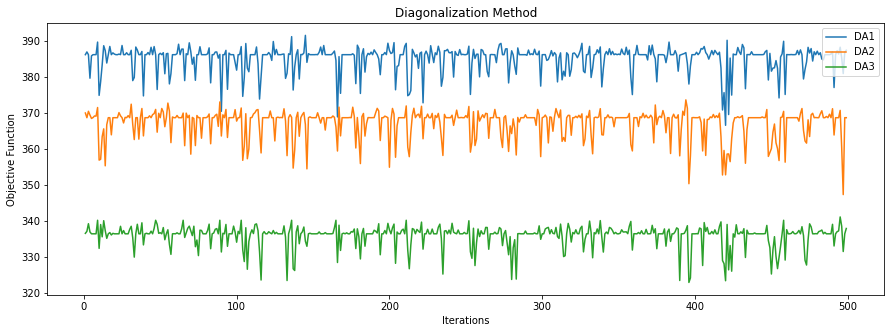

<Figure size 432x288 with 0 Axes>

In [274]:
# plot the costs
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
x=np.arange(1,500)
ax.plot(x, cost_da1,x,cost_da2,x,cost_da3)
ax.legend(['DA1','DA2','DA3'],loc='upper right')
plt.xlabel("Iterations")
plt.ylabel("Objective Function")
plt.title("Diagonalization Method")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Nodal_price_DAs.png', dpi=100)

## Search for relation in the cost

In [275]:
# Create time instance
time=[]
result= np.arange(16,40)
for i in range(2,500):
    time=np.arange(16,40)
    result =[y for x in [result, time] for y in x]

In [276]:
# Create new data frame from Three filse
iteration=np.arange(1,500)
df_all=pd.DataFrame({'Iteration':iteration,'DA1_Cost':cost_da1, 'DA2_Cost':cost_da2, 'DA3_Cost':cost_da3})

In [277]:
# pd.melt(df2, id_vars=["Time"], var_name="Bidder", value_name='obj_value')
df_all = pd.melt(df_all, id_vars=["Iteration"], var_name="Bidder", value_name='Totall_Cost')

In [278]:
df_all

,Iteration,Bidder,Totall_Cost
0,1,DA1_Cost,386.200330
1,2,DA1_Cost,386.968561
2,3,DA1_Cost,386.200330
3,4,DA1_Cost,379.667825
4,5,DA1_Cost,385.865241
...,...,...,...
1492,495,DA3_Cost,341.160014
1493,496,DA3_Cost,338.582654
1494,497,DA3_Cost,331.562438
1495,498,DA3_Cost,336.477337


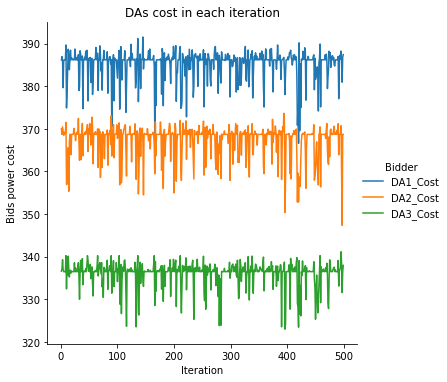

In [279]:
ax= sns.relplot(data=df_all, x='Iteration', y='Totall_Cost', kind='line', hue='Bidder');
ax.set(xlabel='Iteration', title='DAs cost in each iteration', ylabel='Bids power cost');
# plt.legend(loc='upper right', labels=['DA1', 'DA2', 'DA3'])
# ax.savefig('DAs_bids_STD_plot.png', dpi=100)

In [280]:
# Create new instance of the data frame
del(df_all)

df_all = pd.DataFrame({'Time':result, 'DA1_Cost':df1['Cost'], 'DA2_Cost':df2['Cost'], 'DA3_Cost':df3['Cost']})

In [281]:
df_all

,Time,DA1_Cost,DA2_Cost,DA3_Cost
24,16,5.307220,7.242588,5.289296
25,17,16.136470,13.210912,8.949385
26,18,19.922639,16.983361,22.398249
27,19,13.046604,23.634802,22.260209
28,20,21.319158,43.040191,23.294311
...,...,...,...,...
11995,35,6.316488,16.147911,6.658412
11996,36,4.746164,7.351101,4.772380
11997,37,4.348029,8.045875,5.050290
11998,38,19.791179,16.660443,20.221578


In [282]:
df_all= pd.melt(df_all, id_vars=["Time"], var_name="Bidder", value_name='Power_Cost')

In [283]:
df_all

,Time,Bidder,Power_Cost
0,16,DA1_Cost,5.307220
1,17,DA1_Cost,16.136470
2,18,DA1_Cost,19.922639
3,19,DA1_Cost,13.046604
4,20,DA1_Cost,21.319158
...,...,...,...
35923,35,DA3_Cost,6.658412
35924,36,DA3_Cost,4.772380
35925,37,DA3_Cost,5.050290
35926,38,DA3_Cost,20.221578


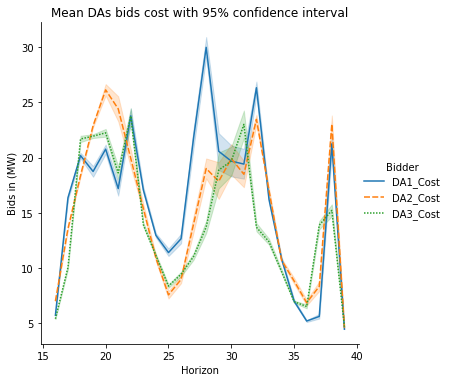

In [284]:
ax= sns.relplot(data=df_all, x='Time', y='Power_Cost', kind='line', hue='Bidder', style='Bidder');
ax.set(xlabel='Horizon', title='Mean DAs bids cost with 95% confidence interval', ylabel='Bids in (MW)');
# plt.legend(loc='upper right', labels=['DA1', 'DA2', 'DA3'])
# ax.savefig('DAs_bids_STD_plot.png', dpi=100)

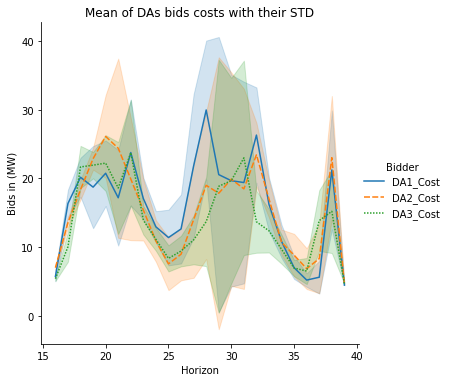

In [285]:
ax= sns.relplot(data=df_all, x='Time', y='Power_Cost', kind='line', hue='Bidder', style='Bidder', ci="sd");
ax.set(xlabel='Horizon', title='Mean of DAs bids costs with their STD', ylabel='Bids in (MW)');

## Analyzing each DA file separately

### DA1

In [296]:
df1['Time']=result

In [297]:
df1

,Iteration,DAs_load\nE_DAs_L,DAs_generation\nE_DAs_G,DAs_demand_bid\nb_t,DAs_supply_offer\no_t,EVs_Charge,EVs_Discharge,TCL_Power,SL_Power,Inflexible_loads,...,CDA1_demand,CDA2_demand,Bus1_price,Bus2_price,Bus3_price,Theta_bus_1,Theta_bus_2,Theta_bus_3,Cost,Time
24,1,0.353815,0.0,0.353815,0.0,0.000000e+00,0.0,0.000000e+00,0.008640,0.346111,...,0.478840,0.361124,15.0,15.0,15.0,0.0,0.0,0.0,5.307220,16
25,1,1.075765,0.0,1.075765,0.0,0.000000e+00,0.0,0.000000e+00,0.476927,0.599952,...,0.924966,0.599270,15.0,15.0,15.0,0.0,0.0,0.0,16.136470,17
26,1,1.328176,0.0,1.328176,0.0,3.787234e-02,0.0,8.673617e-20,0.506569,0.784733,...,0.859034,1.281060,15.0,15.0,15.0,0.0,0.0,0.0,19.922639,18
27,1,0.869774,0.0,0.869774,0.0,0.000000e+00,0.0,0.000000e+00,0.042076,0.828766,...,1.656593,1.171153,15.0,15.0,15.0,0.0,0.0,0.0,13.046604,19
28,1,1.421277,0.0,1.421277,0.0,0.000000e+00,0.0,0.000000e+00,0.610549,0.810728,...,1.705375,1.225556,15.0,15.0,15.0,0.0,0.0,0.0,21.319158,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,499,0.421099,0.0,0.421099,0.0,7.105427e-18,0.0,3.686287e-20,0.089976,0.332132,...,0.639374,0.514534,15.0,15.0,15.0,0.0,0.0,0.0,6.316488,35
11996,499,0.316411,0.0,0.316411,0.0,0.000000e+00,0.0,0.000000e+00,0.016436,0.300967,...,0.963705,0.445589,15.0,15.0,15.0,0.0,0.0,0.0,4.746164,36
11997,499,0.289869,0.0,0.289869,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.290863,...,0.559277,0.963276,15.0,15.0,15.0,0.0,0.0,0.0,4.348029,37
11998,499,1.319412,0.0,1.319412,0.0,0.000000e+00,0.0,0.000000e+00,1.011473,0.308949,...,1.259988,1.093104,15.0,15.0,15.0,0.0,0.0,0.0,19.791179,38


In [298]:
da1_mean_hourly = df1.groupby(['Time']).Cost.mean()

In [299]:
# Create new instance of the data frame
del(df_all)

# Create new data frame from Three filse
iteration=np.arange(1,500)
df_all=pd.DataFrame({'Iteration':iteration,'DA1_Cost':cost_da1, 'DA2_Cost':cost_da2, 'DA3_Cost':cost_da3})

In [300]:
np.argmax(df_all.drop(columns=['Iteration']).sum(axis=1))

210

In [301]:
df1

,Iteration,DAs_load\nE_DAs_L,DAs_generation\nE_DAs_G,DAs_demand_bid\nb_t,DAs_supply_offer\no_t,EVs_Charge,EVs_Discharge,TCL_Power,SL_Power,Inflexible_loads,...,CDA1_demand,CDA2_demand,Bus1_price,Bus2_price,Bus3_price,Theta_bus_1,Theta_bus_2,Theta_bus_3,Cost,Time
24,1,0.353815,0.0,0.353815,0.0,0.000000e+00,0.0,0.000000e+00,0.008640,0.346111,...,0.478840,0.361124,15.0,15.0,15.0,0.0,0.0,0.0,5.307220,16
25,1,1.075765,0.0,1.075765,0.0,0.000000e+00,0.0,0.000000e+00,0.476927,0.599952,...,0.924966,0.599270,15.0,15.0,15.0,0.0,0.0,0.0,16.136470,17
26,1,1.328176,0.0,1.328176,0.0,3.787234e-02,0.0,8.673617e-20,0.506569,0.784733,...,0.859034,1.281060,15.0,15.0,15.0,0.0,0.0,0.0,19.922639,18
27,1,0.869774,0.0,0.869774,0.0,0.000000e+00,0.0,0.000000e+00,0.042076,0.828766,...,1.656593,1.171153,15.0,15.0,15.0,0.0,0.0,0.0,13.046604,19
28,1,1.421277,0.0,1.421277,0.0,0.000000e+00,0.0,0.000000e+00,0.610549,0.810728,...,1.705375,1.225556,15.0,15.0,15.0,0.0,0.0,0.0,21.319158,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,499,0.421099,0.0,0.421099,0.0,7.105427e-18,0.0,3.686287e-20,0.089976,0.332132,...,0.639374,0.514534,15.0,15.0,15.0,0.0,0.0,0.0,6.316488,35
11996,499,0.316411,0.0,0.316411,0.0,0.000000e+00,0.0,0.000000e+00,0.016436,0.300967,...,0.963705,0.445589,15.0,15.0,15.0,0.0,0.0,0.0,4.746164,36
11997,499,0.289869,0.0,0.289869,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.290863,...,0.559277,0.963276,15.0,15.0,15.0,0.0,0.0,0.0,4.348029,37
11998,499,1.319412,0.0,1.319412,0.0,0.000000e+00,0.0,0.000000e+00,1.011473,0.308949,...,1.259988,1.093104,15.0,15.0,15.0,0.0,0.0,0.0,19.791179,38


In [302]:
# df1[df1["Iteration"] == np.argmax(df_all.groupby('Iteration').sum())]
# Selecting valuse for best cost in diagonalization
DA1_best_cost =df1[df1.Iteration==np.argmax(df_all.drop(columns=['Iteration']).sum(axis=1))].Cost

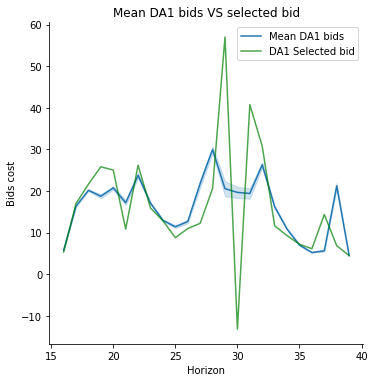

In [303]:
ax= sns.relplot(data=df1, x='Time', y='Cost', kind='line');
ax.set(xlabel='Horizon', title='Mean DA1 bids VS selected bid', ylabel='Bids cost');
plt.plot(np.arange(16,40),DA1_best_cost, color='g', alpha=0.7);
plt.legend(['Mean DA1 bids','DA1 Selected bid'],loc='best');
ax.savefig('DA1_mean_bid_selected_bid.png')

## DA2

In [306]:
df2['Time']=result
da2_mean_hourly = df2.groupby(['Time']).Cost.mean()
DA2_best_cost =df2[df2.Iteration==np.argmax(df_all.drop(columns=['Iteration']).sum(axis=1))].Cost


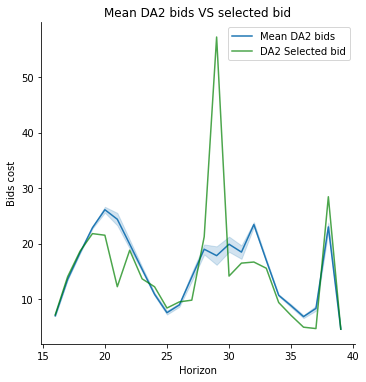

In [307]:
ax= sns.relplot(data=df2, x='Time', y='Cost', kind='line');
ax.set(xlabel='Horizon', title='Mean DA2 bids VS selected bid', ylabel='Bids cost');
plt.plot(np.arange(16,40),DA2_best_cost, color='g', alpha=0.7);
plt.legend(['Mean DA2 bids','DA2 Selected bid'],loc='best');
ax.savefig('DA2_mean_bid_selected_bid.png')

## DA3

In [308]:
df3['Time']=result
da3_mean_hourly = df3.groupby(['Time']).Cost.mean()
DA3_best_cost =df3[df3.Iteration==np.argmax(df_all.drop(columns=['Iteration']).sum(axis=1))].Cost


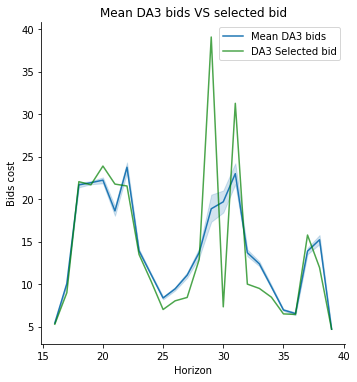

In [309]:
ax= sns.relplot(data=df3, x='Time', y='Cost', kind='line');
ax.set(xlabel='Horizon', title='Mean DA3 bids VS selected bid', ylabel='Bids cost');
plt.plot(np.arange(16,40),DA3_best_cost, color='g', alpha=0.7);
plt.legend(['Mean DA3 bids','DA3 Selected bid'],loc='best');
ax.savefig('DA3_mean_bid_selected_bid.png')

## Generation and load plots

In [310]:
df1

,Iteration,DAs_load\nE_DAs_L,DAs_generation\nE_DAs_G,DAs_demand_bid\nb_t,DAs_supply_offer\no_t,EVs_Charge,EVs_Discharge,TCL_Power,SL_Power,Inflexible_loads,...,CDA1_demand,CDA2_demand,Bus1_price,Bus2_price,Bus3_price,Theta_bus_1,Theta_bus_2,Theta_bus_3,Cost,Time
24,1,0.353815,0.0,0.353815,0.0,0.000000e+00,0.0,0.000000e+00,0.008640,0.346111,...,0.478840,0.361124,15.0,15.0,15.0,0.0,0.0,0.0,5.307220,16
25,1,1.075765,0.0,1.075765,0.0,0.000000e+00,0.0,0.000000e+00,0.476927,0.599952,...,0.924966,0.599270,15.0,15.0,15.0,0.0,0.0,0.0,16.136470,17
26,1,1.328176,0.0,1.328176,0.0,3.787234e-02,0.0,8.673617e-20,0.506569,0.784733,...,0.859034,1.281060,15.0,15.0,15.0,0.0,0.0,0.0,19.922639,18
27,1,0.869774,0.0,0.869774,0.0,0.000000e+00,0.0,0.000000e+00,0.042076,0.828766,...,1.656593,1.171153,15.0,15.0,15.0,0.0,0.0,0.0,13.046604,19
28,1,1.421277,0.0,1.421277,0.0,0.000000e+00,0.0,0.000000e+00,0.610549,0.810728,...,1.705375,1.225556,15.0,15.0,15.0,0.0,0.0,0.0,21.319158,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,499,0.421099,0.0,0.421099,0.0,7.105427e-18,0.0,3.686287e-20,0.089976,0.332132,...,0.639374,0.514534,15.0,15.0,15.0,0.0,0.0,0.0,6.316488,35
11996,499,0.316411,0.0,0.316411,0.0,0.000000e+00,0.0,0.000000e+00,0.016436,0.300967,...,0.963705,0.445589,15.0,15.0,15.0,0.0,0.0,0.0,4.746164,36
11997,499,0.289869,0.0,0.289869,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.290863,...,0.559277,0.963276,15.0,15.0,15.0,0.0,0.0,0.0,4.348029,37
11998,499,1.319412,0.0,1.319412,0.0,0.000000e+00,0.0,0.000000e+00,1.011473,0.308949,...,1.259988,1.093104,15.0,15.0,15.0,0.0,0.0,0.0,19.791179,38


In [311]:
da1_mean_load = df1.groupby(['Time'])["DAs_load\nE_DAs_L"].mean()
DA1_best_load = df1[df1.Iteration==np.argmax(df_all.drop(columns=['Iteration']).sum(axis=1))]["DAs_load\nE_DAs_L"]


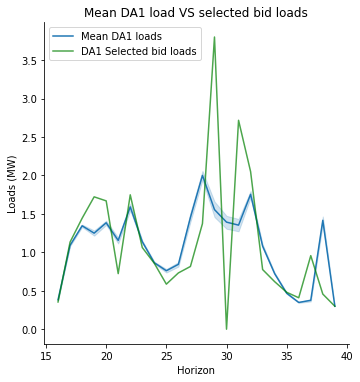

In [315]:
ax= sns.relplot(data=df1, x='Time', y='DAs_load\nE_DAs_L', kind='line');
ax.set(xlabel='Horizon', title='Mean DA1 load VS selected bid loads', ylabel='Loads (MW)');
plt.plot(np.arange(16,40),DA1_best_load, color='g', alpha=0.7);
plt.legend(['Mean DA1 loads','DA1 Selected bid loads'],loc='best');
ax.savefig('DA1_mean_load_selected_bid.png')

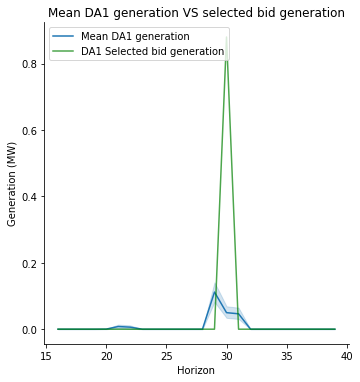

In [318]:
# Generation
da1_mean_gen = df1.groupby(['Time'])["DAs_generation\nE_DAs_G"].mean()
DA1_best_gen = df1[df1.Iteration==np.argmax(df_all.drop(columns=['Iteration']).sum(axis=1))]["DAs_generation\nE_DAs_G"]
ax= sns.relplot(data=df1, x='Time', y="DAs_generation\nE_DAs_G", kind='line');
ax.set(xlabel='Horizon', title='Mean DA1 generation VS selected bid generation', ylabel='Generation (MW)');
plt.plot(np.arange(16,40),DA1_best_gen, color='g', alpha=0.7);
plt.legend(['Mean DA1 generation','DA1 Selected bid generation'],loc="upper left");
ax.savefig('DA1_mean_generate_selected_bid.png')

### DA2 load and Genration

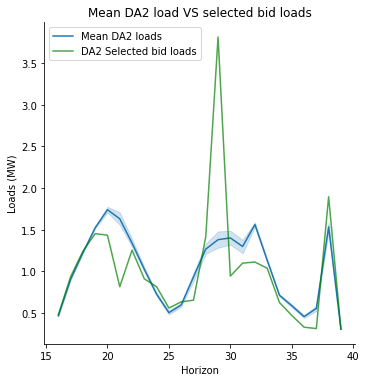

In [319]:
da2_mean_load = df2.groupby(['Time'])["DAs_load\nE_DAs_L"].mean()
DA2_best_load = df2[df2.Iteration==np.argmax(df_all.drop(columns=['Iteration']).sum(axis=1))]["DAs_load\nE_DAs_L"]
ax= sns.relplot(data=df2, x='Time', y='DAs_load\nE_DAs_L', kind='line');
ax.set(xlabel='Horizon', title='Mean DA2 load VS selected bid loads', ylabel='Loads (MW)');
plt.plot(np.arange(16,40),DA2_best_load, color='g', alpha=0.7);
plt.legend(['Mean DA2 loads','DA2 Selected bid loads'],loc='best');
ax.savefig('DA2_mean_load_selected_bid.png')

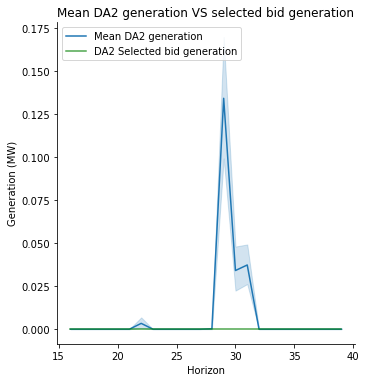

In [322]:
# Generation
da2_mean_gen = df2.groupby(['Time'])["DAs_generation\nE_DAs_G"].mean()
DA2_best_gen = df2[df2.Iteration==np.argmax(df_all.drop(columns=['Iteration']).sum(axis=1))]["DAs_generation\nE_DAs_G"]
ax= sns.relplot(data=df2, x='Time', y="DAs_generation\nE_DAs_G", kind='line');
ax.set(xlabel='Horizon', title='Mean DA2 generation VS selected bid generation', ylabel='Generation (MW)');
plt.plot(np.arange(16,40),DA2_best_gen, color='g', alpha=0.7);
plt.legend(['Mean DA2 generation','DA2 Selected bid generation'],loc="upper left");
ax.savefig('DA2_mean_generate_selected_bid.png')

### DA3 load and Generation

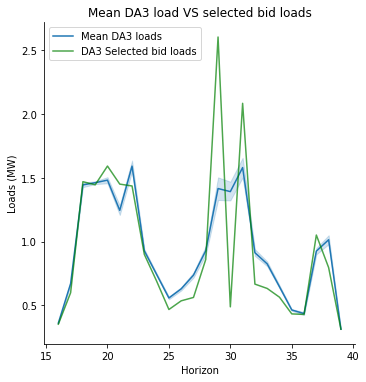

In [323]:
da3_mean_load = df3.groupby(['Time'])["DAs_load\nE_DAs_L"].mean()
DA3_best_load = df3[df3.Iteration==np.argmax(df_all.drop(columns=['Iteration']).sum(axis=1))]["DAs_load\nE_DAs_L"]
ax= sns.relplot(data=df3, x='Time', y='DAs_load\nE_DAs_L', kind='line');
ax.set(xlabel='Horizon', title='Mean DA3 load VS selected bid loads', ylabel='Loads (MW)');
plt.plot(np.arange(16,40),DA3_best_load, color='g', alpha=0.7);
plt.legend(['Mean DA3 loads','DA3 Selected bid loads'],loc='best');
ax.savefig('DA3_mean_load_selected_bid.png')

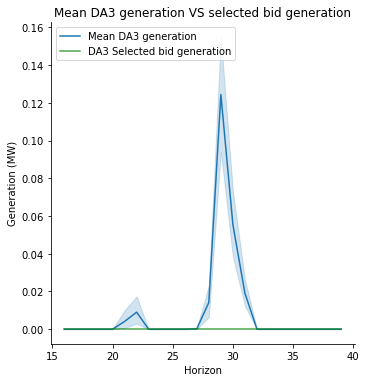

In [324]:
# Generation
da3_mean_gen = df3.groupby(['Time'])["DAs_generation\nE_DAs_G"].mean()
DA3_best_gen = df3[df3.Iteration==np.argmax(df_all.drop(columns=['Iteration']).sum(axis=1))]["DAs_generation\nE_DAs_G"]
ax= sns.relplot(data=df3, x='Time', y="DAs_generation\nE_DAs_G", kind='line');
ax.set(xlabel='Horizon', title='Mean DA3 generation VS selected bid generation', ylabel='Generation (MW)');
plt.plot(np.arange(16,40),DA3_best_gen, color='g', alpha=0.7);
plt.legend(['Mean DA3 generation','DA3 Selected bid generation'],loc="upper left");
ax.savefig('DA3_mean_generate_selected_bid.png')

## Generators loads

In [330]:
df_temp = df1.groupby('Time')[['Gen1', 'Gen2', 'Gen3']].mean()

,Gen1,Gen2,Gen3
Time,,,
16,1.212533,0.0,0.000000
17,2.667003,0.0,0.000000
18,4.015218,0.0,0.000000
19,4.236190,0.0,0.000000
20,4.605302,0.0,0.000000
21,4.021157,0.0,0.000000
22,4.501632,0.0,0.000000
23,3.093098,0.0,0.000000
24,2.335669,0.0,0.000000


In [329]:
df1

,Iteration,DAs_load\nE_DAs_L,DAs_generation\nE_DAs_G,DAs_demand_bid\nb_t,DAs_supply_offer\no_t,EVs_Charge,EVs_Discharge,TCL_Power,SL_Power,Inflexible_loads,...,CDA1_demand,CDA2_demand,Bus1_price,Bus2_price,Bus3_price,Theta_bus_1,Theta_bus_2,Theta_bus_3,Cost,Time
24,1,0.353815,0.0,0.353815,0.0,0.000000e+00,0.0,0.000000e+00,0.008640,0.346111,...,0.478840,0.361124,15.0,15.0,15.0,0.0,0.0,0.0,5.307220,16
25,1,1.075765,0.0,1.075765,0.0,0.000000e+00,0.0,0.000000e+00,0.476927,0.599952,...,0.924966,0.599270,15.0,15.0,15.0,0.0,0.0,0.0,16.136470,17
26,1,1.328176,0.0,1.328176,0.0,3.787234e-02,0.0,8.673617e-20,0.506569,0.784733,...,0.859034,1.281060,15.0,15.0,15.0,0.0,0.0,0.0,19.922639,18
27,1,0.869774,0.0,0.869774,0.0,0.000000e+00,0.0,0.000000e+00,0.042076,0.828766,...,1.656593,1.171153,15.0,15.0,15.0,0.0,0.0,0.0,13.046604,19
28,1,1.421277,0.0,1.421277,0.0,0.000000e+00,0.0,0.000000e+00,0.610549,0.810728,...,1.705375,1.225556,15.0,15.0,15.0,0.0,0.0,0.0,21.319158,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,499,0.421099,0.0,0.421099,0.0,7.105427e-18,0.0,3.686287e-20,0.089976,0.332132,...,0.639374,0.514534,15.0,15.0,15.0,0.0,0.0,0.0,6.316488,35
11996,499,0.316411,0.0,0.316411,0.0,0.000000e+00,0.0,0.000000e+00,0.016436,0.300967,...,0.963705,0.445589,15.0,15.0,15.0,0.0,0.0,0.0,4.746164,36
11997,499,0.289869,0.0,0.289869,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.290863,...,0.559277,0.963276,15.0,15.0,15.0,0.0,0.0,0.0,4.348029,37
11998,499,1.319412,0.0,1.319412,0.0,0.000000e+00,0.0,0.000000e+00,1.011473,0.308949,...,1.259988,1.093104,15.0,15.0,15.0,0.0,0.0,0.0,19.791179,38
